In [1]:
from pathlib import Path
import pandas as pd

In [2]:
path_ani="../experiments-paper/6mer/07_25_2024-autoencoder/cross-validation/confident-learning/ani-results"

In [3]:
not_empty=[]
for path in Path(path_ani).glob("*txt"):
    
    with open(path,"r") as fp:
        x=fp.read()

    if x:
        not_empty.append(pd.read_csv(path,sep="\t", header=None))

In [4]:
path="../experiments-paper/6mer/07_25_2024-autoencoder/cross-validation/confident-learning/ani-results/SAMD00012605.txt"

In [86]:
df = pd.concat(not_empty, axis=0, ignore_index=True)

In [87]:
df.rename({0:"path_ebi",
           1:"path_ref",
           2:"ani",
           }, axis=1, inplace=True)

In [88]:
path_references = pd.read_csv("../data/path_reference_by_accession.txt", sep=" ", header=None)
path_references.rename({0:"Assembly Accession", 1:"path"}, inplace=True, axis=1)
metadata_references = pd.read_csv("../data/ncbi_reference_sequences.txt", sep="\t")
df_references = pd.merge(metadata_references, path_references, on="Assembly Accession")
df_references.head()

,label,Assembly Accession,Organism Name,Assembly Release Date,path
0,xanthomonas_euvesicatoria,GCF_017724035.1,Xanthomonas euvesicatoria pv. alfalfae,2021-04-03,data/ref-seqs/GCF_017724035.1/ncbi_dataset/dat...
1,streptococcus_pyogenes,GCF_900475035.1,Streptococcus pyogenes,2018-06-17,data/ref-seqs/GCF_900475035.1/ncbi_dataset/dat...
2,corynebacterium_glutamicum,GCF_000404185.1,Corynebacterium glutamicum SCgG2,2013-06-03,data/ref-seqs/GCF_000404185.1/ncbi_dataset/dat...
3,vibrio_parahaemolyticus,GCF_000196095.1,Vibrio parahaemolyticus RIMD 2210633,2004-05-11,data/ref-seqs/GCF_000196095.1/ncbi_dataset/dat...
4,mycobacteroides_chelonae,GCF_001632805.1,Mycobacteroides chelonae CCUG 47445,2016-04-27,data/ref-seqs/GCF_001632805.1/ncbi_dataset/dat...


In [89]:
# create dictionary to map label to the reference path
label2refpath = {l:p for l,p in zip(df_references.label, df_references.path)}

refpath2label = {p:l for l,p in zip(df_references.label, df_references.path)}

In [90]:
path_issues="../experiments-paper/6mer/07_25_2024-autoencoder/cross-validation/confident-learning/metadata_issues.tsv"
metadata_issues = pd.read_csv(path_issues, sep="\t")

sampleid2label = {sid: l for sid, l in zip(metadata_issues.sample_id, metadata_issues.label)}

In [91]:
df.path_ebi[0]

'experiments-paper/6mer/07_25_2024-autoencoder/cross-validation/confident-learning/seqs-issues/bacillus_cereus__01/SAMEA41934418.fa'

In [92]:
df["label_ref"] = df["path_ref"].apply(lambda p: refpath2label[p])
df["sample_id"] =df["path_ebi"].apply(lambda p: Path(p).stem)
df["label_ebi"] =df["sample_id"].apply(lambda sid: sampleid2label[sid])

In [93]:
df.query("label_ebi != label_ref and ani >= 95")

,path_ebi,path_ref,ani,3,4,label_ref,sample_id,label_ebi
0,experiments-paper/6mer/07_25_2024-autoencoder/...,data/ref-seqs/GCF_000008445.1/ncbi_dataset/dat...,97.5367,1430,1623,bacillus_anthracis,SAMEA41934418,bacillus_cereus
5,experiments-paper/6mer/07_25_2024-autoencoder/...,data/ref-seqs/GCF_024218835.1/ncbi_dataset/dat...,99.1356,1461,1647,enterobacter_hormaechei,SAMEA2273446,enterobacter_cloacae
8,experiments-paper/6mer/07_25_2024-autoencoder/...,data/ref-seqs/GCF_000054005.1/ncbi_dataset/dat...,99.7089,1063,1081,brucella_abortus,SAMN02795970,brucella_melitensis
10,experiments-paper/6mer/07_25_2024-autoencoder/...,data/ref-seqs/GCF_000054005.1/ncbi_dataset/dat...,99.6916,1074,1088,brucella_abortus,SAMN08888022,brucella_melitensis
25,experiments-paper/6mer/07_25_2024-autoencoder/...,data/ref-seqs/GCF_000054005.1/ncbi_dataset/dat...,99.6994,1074,1090,brucella_abortus,SAMN05932954,brucella_melitensis
...,...,...,...,...,...,...,...,...
12156,experiments-paper/6mer/07_25_2024-autoencoder/...,data/ref-seqs/GCF_000054005.1/ncbi_dataset/dat...,99.6372,1061,1082,brucella_abortus,SAMN00839733,brucella_suis
12164,experiments-paper/6mer/07_25_2024-autoencoder/...,data/ref-seqs/GCF_000008865.2/ncbi_dataset/dat...,97.4367,1188,1274,escherichia_coli,SAMEA2517537,shigella_flexneri
12165,experiments-paper/6mer/07_25_2024-autoencoder/...,data/ref-seqs/GCF_001718335.1/ncbi_dataset/dat...,95.2882,1956,2268,burkholderia_territorii,SAMN03449597,burkholderia_diffusa
12169,experiments-paper/6mer/07_25_2024-autoencoder/...,data/ref-seqs/GCF_000008865.2/ncbi_dataset/dat...,97.6290,1385,1568,escherichia_coli,SAMEA3268861,enterococcus_faecalis


___

## ani.tsv and metadata_issues.tsv

In [33]:
import pandas as pd 
path_ani="../experiments-paper/7mer/07_28_2024-autoencoder/cross-validation/confident-learning/ani.tsv"
df_ani = pd.read_csv(path_ani, sep="\t")

In [34]:
df_ani.query("label_ref == label_ebi and ani>=95")

,Unnamed: 0,path_ebi,path_ref,ani,3,4,label_ref,sample_id,label_ebi
1,1,experiments-paper/7mer/07_28_2024-autoencoder/...,data/ref-seqs/GCF_000008865.2/ncbi_dataset/dat...,97.5226,1402,2541,escherichia_coli,SAMN06018941,escherichia_coli
6,6,experiments-paper/7mer/07_28_2024-autoencoder/...,data/ref-seqs/GCF_000007125.1/ncbi_dataset/dat...,99.9890,1079,1081,brucella_melitensis,SAMN02795970,brucella_melitensis
8,8,experiments-paper/7mer/07_28_2024-autoencoder/...,data/ref-seqs/GCF_000007125.1/ncbi_dataset/dat...,99.8328,1083,1088,brucella_melitensis,SAMN08888022,brucella_melitensis
16,16,experiments-paper/7mer/07_28_2024-autoencoder/...,data/ref-seqs/GCF_900416725.2/ncbi_dataset/dat...,98.1310,361,592,chlamydia_abortus,SAMEA893020,chlamydia_abortus
17,17,experiments-paper/7mer/07_28_2024-autoencoder/...,data/ref-seqs/GCF_024218835.1/ncbi_dataset/dat...,97.2200,1309,1529,enterobacter_hormaechei,SAMN07501524,enterobacter_hormaechei
...,...,...,...,...,...,...,...,...,...
16848,16848,experiments-paper/7mer/07_28_2024-autoencoder/...,data/ref-seqs/GCF_000195955.2/ncbi_dataset/dat...,99.8152,1257,3667,mycobacterium_tuberculosis,SAMN09867655,mycobacterium_tuberculosis
16850,16850,experiments-paper/7mer/07_28_2024-autoencoder/...,data/ref-seqs/GCF_900475035.1/ncbi_dataset/dat...,98.7053,530,1311,streptococcus_pyogenes,SAMEA3918970,streptococcus_pyogenes
16856,16856,experiments-paper/7mer/07_28_2024-autoencoder/...,data/ref-seqs/GCF_000195955.2/ncbi_dataset/dat...,99.4752,1380,3172,mycobacterium_tuberculosis,SAMN09284332,mycobacterium_tuberculosis
16860,16860,experiments-paper/7mer/07_28_2024-autoencoder/...,data/ref-seqs/GCF_024218835.1/ncbi_dataset/dat...,95.8860,1368,1682,enterobacter_hormaechei,SAMN03733791,enterobacter_hormaechei


In [35]:
change_label = df_ani.query("label_ref != label_ebi and ani>=95")

In [39]:
change_label.shape


(3090, 9)

In [40]:
df_ani.shape

(16864, 9)

### number of changes by label

In [36]:
counts = change_label.groupby(by=["label_ebi"]).size().reset_index()
counts.sort_values(by=0, ascending=False, inplace=True, ignore_index=True)
counts

,label_ebi,0
0,shigella_flexneri,483
1,enterobacter_cloacae,478
2,shigella_dysenteriae,333
3,brucella_melitensis,248
4,brucella_suis,139
...,...,...
152,paraburkholderia_terrae,1
153,finegoldia_magna,1
154,escherichia_marmotae,1
155,escherichia_albertii,1


In [37]:
counts_2 = change_label.groupby(by=["label_ebi","label_ref"]).size().reset_index()
counts_2.query(f"label_ebi in {tuple(counts.label_ebi[:10])}")

,label_ebi,label_ref,0
15,bacillus_cereus,bacillus_anthracis,94
16,bacillus_cereus,bacillus_thuringiensis,7
17,bacillus_cereus,streptococcus_pneumoniae,11
26,bacillus_thuringiensis,bacillus_anthracis,4
27,bacillus_thuringiensis,bacillus_cereus,94
28,bacillus_thuringiensis,listeria_monocytogenes,1
29,bacillus_thuringiensis,mycobacterium_tuberculosis,1
30,bacillus_thuringiensis,streptococcus_pneumoniae,2
36,brucella_canis,brucella_abortus,76
39,brucella_melitensis,brucella_abortus,248


In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = set(change_label.label_ref.unique()).union(change_label.label_ebi.unique())
labels = list(labels)
labels

['acinetobacter_nosocomialis',
 'xanthomonas_citri',
 'acinetobacter_calcoaceticus',
 'bacteroides_fragilis',
 'candidatus_planktophila_vernalis',
 'campylobacter_fetus',
 'lactococcus_garvieae',
 'klebsiella_pneumoniae',
 'yersinia_ruckeri',
 'mycobacterium_simiae',
 'escherichia_coli',
 'burkholderia_cenocepacia',
 'bacillus_thuringiensis',
 'candidatus_planktophila_dulcis',
 'coxiella_burnetii',
 'rhizobium_leguminosarum',
 'clostridium_perfringens',
 'corynebacterium_diphtheriae',
 'caulobacter_vibrioides',
 'bordetella_bronchiseptica',
 'ralstonia_pickettii',
 'acinetobacter_radioresistens',
 'haemophilus_influenzae',
 'enterobacter_bugandensis',
 'clostridium_butyricum',
 'actinomyces_radicidentis',
 'acinetobacter_lwoffii',
 'staphylococcus_warneri',
 'raoultella_ornithinolytica',
 'dichelobacter_nodosus',
 'bacillus_subtilis',
 'staphylococcus_saprophyticus',
 'klebsiella_variicola',
 'mycobacterium_tuberculosis',
 'micrococcus_luteus',
 'neisseria_sicca',
 'burkholderia_territ

In [6]:
from collections import Counter

count = Counter(change_label.label_ref)
most_common_labels = [l[0] for l in count.most_common(5)]
most_common_labels

['enterobacter_hormaechei',
 'brucella_abortus',
 'escherichia_coli',
 'bordetella_pertussis',
 'salmonella_enterica']

In [7]:
df_filter = change_label.query(f"`label_ref` in {tuple(most_common_labels)}")

y_ref = df_filter.label_ref.tolist()
y_ebi = df_filter.label_ebi.tolist()
labels = list(set(y_ref).union(y_ebi))
labels.sort()
M = confusion_matrix(y_true = y_ebi, y_pred = y_ref, labels=labels,)#  normalize='true')

In [8]:
import matplotlib.pyplot as plt 
import numpy as np 

non_zero_row = np.where(M.sum(axis=1) != 0)[0]

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=M, display_labels=labels,)# xticks_rotation="vertical")

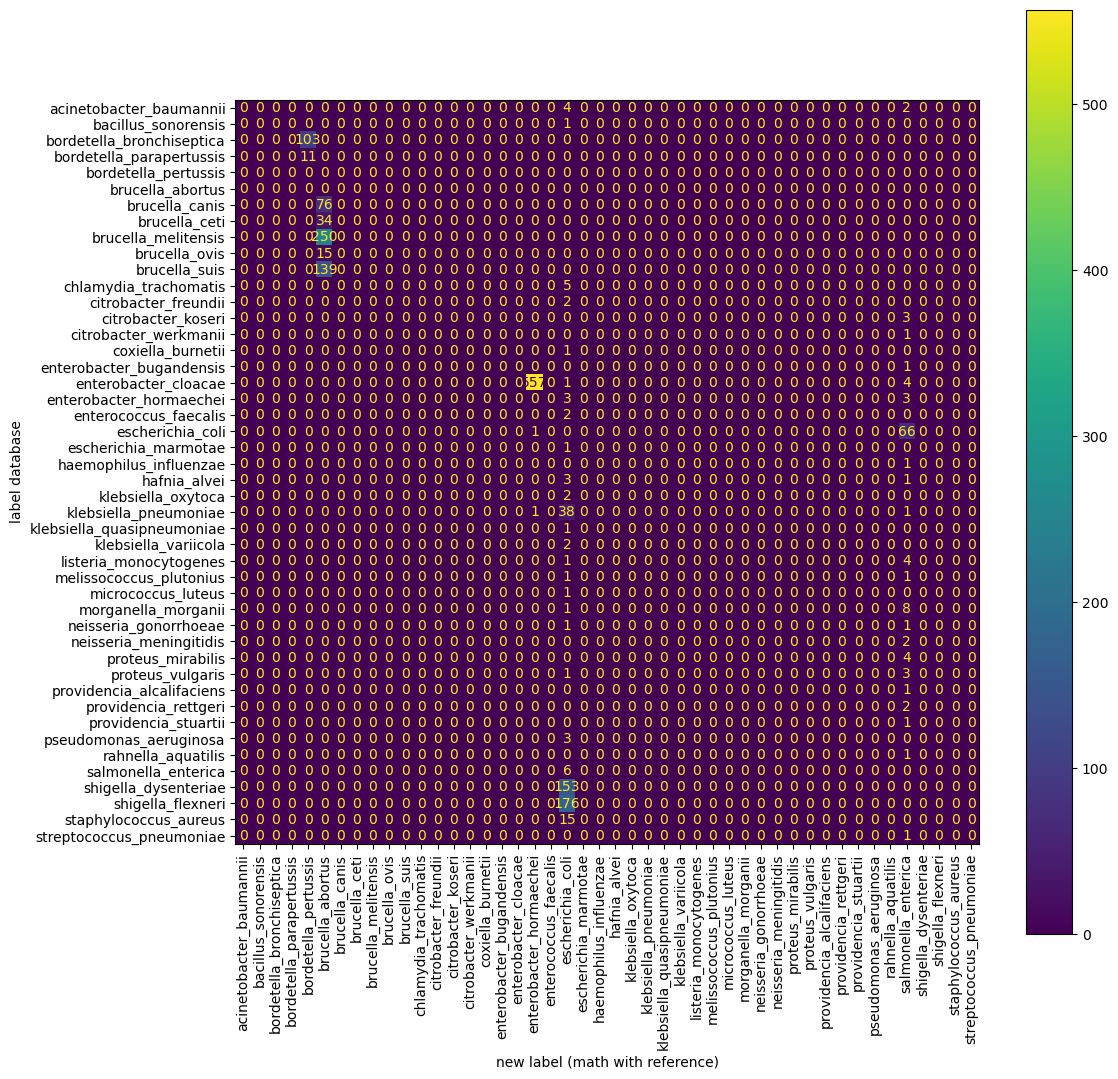

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, xticks_rotation="vertical")

# Customize x and y axis labels (optional)
ax.set_xlabel("new label (math with reference)")
ax.set_ylabel("label database")

plt.show()